In [1]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization


In [2]:
from qiskit import qpy
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [3]:
from src.step_1 import build_ansatz, get_backend

In [ ]:
num_vars = 109
instance = 'vanguard/internal/default'

outputs = []
for device in ['ibm_marrakesh', 'ibm_kyiv']:
    backend = get_backend(device, instance, num_vars)
    for ansatz in ['TwoLocal', 'bfcd']:
        for reps in [1,2,3]:
            ansatz_params = {'entanglement': 'bilinear', 'reps':reps}
            ansatz_, _ = build_ansatz(ansatz, ansatz_params, num_vars, backend)

            # step_2 CIRCUIT OPTIMIZATION
            for trial in range(10):
                print(device, ansatz, reps, trial)
                out_path = f'{ROOT}/data/transpilation/{ansatz_params["entanglement"]}/{num_vars}_pm_{device}_{ansatz}_{reps}_{trial}.qpy'
                if Path(out_path).is_file():
                    with open(out_path, 'br') as f:
                        isa_ansatz = qpy.load(f)[0]
                else:
                    isa_ansatz = generate_preset_pass_manager(target=backend.target, optimization_level=3).run(ansatz_)
                    with open(out_path, 'bw') as f:
                        qpy.dump(isa_ansatz, f)
                outputs.append({'ansatz': ansatz, 'reps': reps, 'device': device, 'trial': trial,
                                'depth': isa_ansatz.depth(),
                                '2q-depth': isa_ansatz.depth(lambda x:x.operation.num_qubits==2),
                                'count_ops': isa_ansatz.count_ops()
                                })

ibm_marrakesh TwoLocal 1 0
ibm_marrakesh TwoLocal 1 1
ibm_marrakesh TwoLocal 1 2
ibm_marrakesh TwoLocal 1 3
ibm_marrakesh TwoLocal 1 4
ibm_marrakesh TwoLocal 1 5
ibm_marrakesh TwoLocal 1 6
ibm_marrakesh TwoLocal 1 7
ibm_marrakesh TwoLocal 1 8
ibm_marrakesh TwoLocal 1 9
ibm_marrakesh TwoLocal 2 0
ibm_marrakesh TwoLocal 2 1
ibm_marrakesh TwoLocal 2 2
ibm_marrakesh TwoLocal 2 3
ibm_marrakesh TwoLocal 2 4
ibm_marrakesh TwoLocal 2 5
ibm_marrakesh TwoLocal 2 6
ibm_marrakesh TwoLocal 2 7
ibm_marrakesh TwoLocal 2 8
ibm_marrakesh TwoLocal 2 9
ibm_marrakesh TwoLocal 3 0
ibm_marrakesh TwoLocal 3 1
ibm_marrakesh TwoLocal 3 2
ibm_marrakesh TwoLocal 3 3
ibm_marrakesh TwoLocal 3 4
ibm_marrakesh TwoLocal 3 5
ibm_marrakesh TwoLocal 3 6
ibm_marrakesh TwoLocal 3 7
ibm_marrakesh TwoLocal 3 8
ibm_marrakesh TwoLocal 3 9
ibm_marrakesh bfcd 1 0
ibm_marrakesh bfcd 1 1
ibm_marrakesh bfcd 1 2
ibm_marrakesh bfcd 1 3
ibm_marrakesh bfcd 1 4
ibm_marrakesh bfcd 1 5
ibm_marrakesh bfcd 1 6
ibm_marrakesh bfcd 1 7
ibm_ma

In [5]:
import pandas as pd

df_passmanager = pd.DataFrame(outputs)
df_passmanager

,ansatz,reps,device,trial,depth,2q-depth,count_ops
0,TwoLocal,1,ibm_marrakesh,0,11,2,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
1,TwoLocal,1,ibm_marrakesh,1,11,2,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
2,TwoLocal,1,ibm_marrakesh,2,11,2,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
3,TwoLocal,1,ibm_marrakesh,3,11,2,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
4,TwoLocal,1,ibm_marrakesh,4,11,2,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
...,...,...,...,...,...,...,...
115,bfcd,3,ibm_kyiv,5,140,18,"{'rz': 5737, 'sx': 3404, 'ecr': 972, 'measure'..."
116,bfcd,3,ibm_kyiv,6,140,18,"{'rz': 5672, 'sx': 3362, 'ecr': 972, 'measure'..."
117,bfcd,3,ibm_kyiv,7,140,18,"{'rz': 5687, 'sx': 3377, 'ecr': 972, 'measure'..."
118,bfcd,3,ibm_kyiv,8,140,18,"{'rz': 5699, 'sx': 3371, 'ecr': 972, 'measure'..."


In [ ]:
from qiskit_ibm_transpiler.transpiler_service import TranspilerService

outputs = []
for device in ['ibm_marrakesh', 'ibm_kyiv']:
    backend = get_backend(device, instance, num_vars)
    cloud_transpiler_service = TranspilerService(
        backend_name=device,
        ai=True,
        optimization_level=3,
    )
    for ansatz in ['TwoLocal', 'bfcd']:
        for reps in [1,2,3]:
            ansatz_params = {'entanglement': 'bilinear', 'reps':reps}
            ansatz_, _ = build_ansatz(ansatz, ansatz_params, num_vars, backend)

            # step_2 CIRCUIT OPTIMIZATION
            for trial in range(10):
                print(device, ansatz, reps, trial)
                out_path = f'{ROOT}/data/transpilation/{ansatz_params["entanglement"]}/{num_vars}_ai_{device}_{ansatz}_{reps}_{trial}.qpy'
                if Path(out_path).is_file():
                    with open(out_path, 'br') as f:
                        isa_ansatz = qpy.load(f)[0]
                else:
                    isa_ansatz = cloud_transpiler_service.run(ansatz_)
                    with open(out_path, 'bw') as f:
                        qpy.dump(isa_ansatz, f)
                outputs.append({'ansatz': ansatz, 'reps': reps, 'device': device, 'trial': trial,
                                'depth': isa_ansatz.depth(),
                                '2q-depth': isa_ansatz.depth(lambda x:x.operation.num_qubits==2),
                                'count_ops': isa_ansatz.count_ops()
                                })


ibm_marrakesh TwoLocal 1 0
ibm_marrakesh TwoLocal 1 1
ibm_marrakesh TwoLocal 1 2
ibm_marrakesh TwoLocal 1 3
ibm_marrakesh TwoLocal 1 4
ibm_marrakesh TwoLocal 1 5
ibm_marrakesh TwoLocal 1 6
ibm_marrakesh TwoLocal 1 7
ibm_marrakesh TwoLocal 1 8
ibm_marrakesh TwoLocal 1 9
ibm_marrakesh TwoLocal 2 0
ibm_marrakesh TwoLocal 2 1
ibm_marrakesh TwoLocal 2 2
ibm_marrakesh TwoLocal 2 3
ibm_marrakesh TwoLocal 2 4
ibm_marrakesh TwoLocal 2 5
ibm_marrakesh TwoLocal 2 6
ibm_marrakesh TwoLocal 2 7
ibm_marrakesh TwoLocal 2 8
ibm_marrakesh TwoLocal 2 9
ibm_marrakesh TwoLocal 3 0
ibm_marrakesh TwoLocal 3 1
ibm_marrakesh TwoLocal 3 2
ibm_marrakesh TwoLocal 3 3
ibm_marrakesh TwoLocal 3 4
ibm_marrakesh TwoLocal 3 5
ibm_marrakesh TwoLocal 3 6
ibm_marrakesh TwoLocal 3 7
ibm_marrakesh TwoLocal 3 8
ibm_marrakesh TwoLocal 3 9
ibm_marrakesh bfcd 1 0
ibm_marrakesh bfcd 1 1
ibm_marrakesh bfcd 1 2
ibm_marrakesh bfcd 1 3
ibm_marrakesh bfcd 1 4
ibm_marrakesh bfcd 1 5
ibm_marrakesh bfcd 1 6
ibm_marrakesh bfcd 1 7
ibm_ma

In [7]:
df_ai = pd.DataFrame(outputs)
df_ai

,ansatz,reps,device,trial,depth,2q-depth,count_ops
0,TwoLocal,1,ibm_marrakesh,0,29,20,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
1,TwoLocal,1,ibm_marrakesh,1,29,20,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
2,TwoLocal,1,ibm_marrakesh,2,29,20,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
3,TwoLocal,1,ibm_marrakesh,3,29,20,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
4,TwoLocal,1,ibm_marrakesh,4,29,20,"{'sx': 436, 'rz': 436, 'measure': 109, 'cz': 1..."
...,...,...,...,...,...,...,...
115,bfcd,3,ibm_kyiv,5,443,84,"{'rz': 7002, 'sx': 3904, 'ecr': 1381, 'x': 295..."
116,bfcd,3,ibm_kyiv,6,359,65,"{'rz': 7014, 'sx': 3892, 'ecr': 1396, 'x': 261..."
117,bfcd,3,ibm_kyiv,7,464,90,"{'rz': 6942, 'sx': 3847, 'ecr': 1375, 'x': 309..."
118,bfcd,3,ibm_kyiv,8,387,69,"{'rz': 7053, 'sx': 3903, 'ecr': 1395, 'x': 256..."


<Axes: xlabel='2q-ops', ylabel='x'>

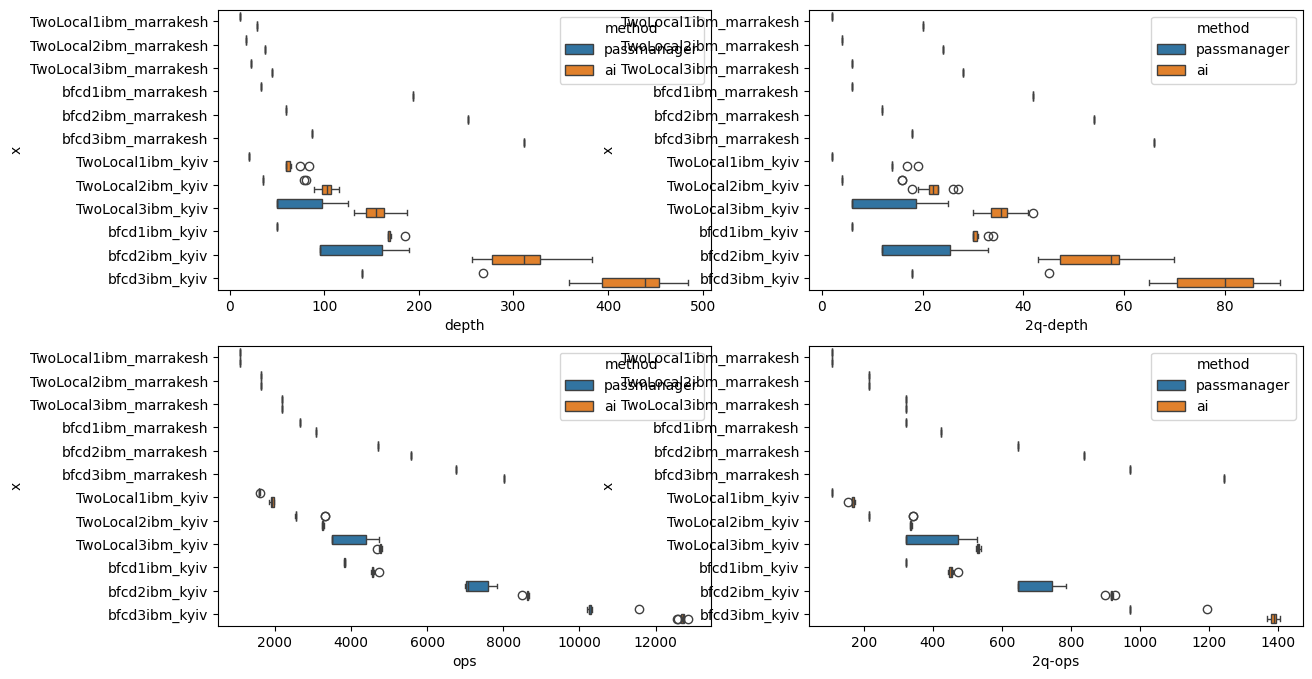

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


df_passmanager['method'] = 'passmanager'
df_ai['method'] = 'ai'

df = pd.concat([df_passmanager, df_ai])
df['x']=df['ansatz'] + df['reps'].apply(str) + df['device']
df['ops'] = df.count_ops.apply(lambda x: sum(x.values()))
df['2q-ops'] = df.count_ops.apply(lambda x: sum(v for k,v in x.items() if k in ['cz', 'ecr']))

_, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,8))
sns.boxplot(df[['x','depth','method']], y='x', x='depth', hue='method', ax=ax1)
# ax1.set_title('depth')
sns.boxplot(df[['x','2q-depth','method']], y='x', x='2q-depth', hue='method', ax=ax2)
# ax2.set_title('2q-depth')
sns.boxplot(df[['x','ops','method']], y='x', x='ops', hue='method', ax=ax3)
# ax3.set_title('ops')
sns.boxplot(df[['x','2q-ops','method']], y='x', x='2q-ops', hue='method', ax=ax4)
# ax4.set_title('2q-ops')